## Feature Engineering


* Perform feature engineering on 12 unique types of features, **three** for each type of feature engineering: **transforming**, **interacting**, **mapping**, and **extracting**.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

Preparing the Data

In [11]:
# preparing our data
raw_prices = pd.read_csv("https://storage.googleapis.com/sovai-public/random/assetalloc.csv", sep=';', parse_dates=True, index_col='Dates', dayfirst=True)
df = raw_prices.sort_values(by='Dates')
df["target"] = df["SP500"].pct_change().shift(-1)
df["target"] = np.where(df["target"]>0,1,0)
df.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,target
Dates,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,0
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,1
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,1
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,0


### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
y = df.pop("target")
X = df.copy()

X_train = X[X.index.astype(str)<'2018-01-01']
y_train = y[X_train.index]
X_test = X[~X.index.isin(X_train.index)]
y_test = y[X_test.index]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### EDA: Correlation matrix

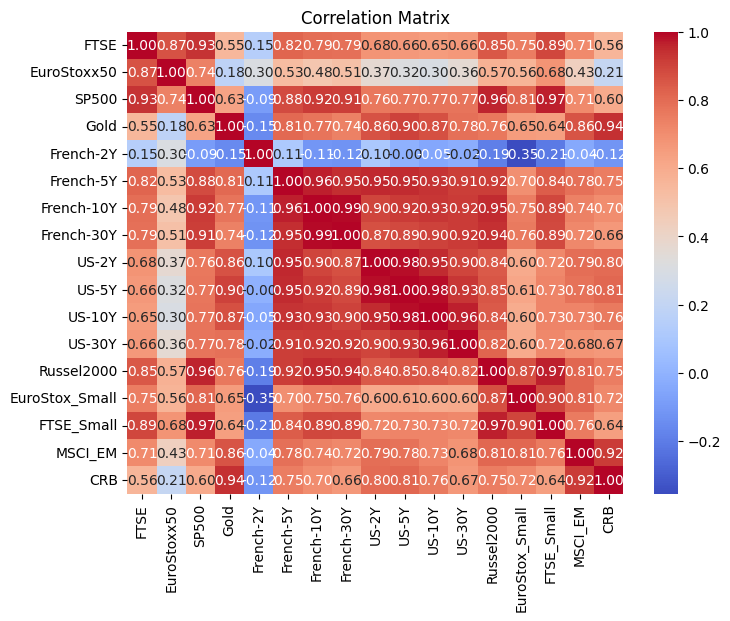

In [13]:
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

EDA: It seems that French-2Y is not very correlated to other features, also EuroStoxx50 is not very correlated to other features, but other features are correlated to each other.

Here just make deep copy for features tranformations in part mapping.

In [ ]:
df_mapping=X_train.copy(deep=True)
df_mapping_test=X_test.copy(deep=True)

Here just make deep copy for features tranformations in part extraction.

In [ ]:
df_extract=X_train.copy(deep=True)
df_extract_test=X_test.copy(deep=True)

Here just make deep copy for use in part deep learning models.

In [14]:
Xtr=X_train.copy(deep=True)
Xte=X_test.copy(deep=True)

### Transforming

In [ ]:
## Transforming 1

# Name: Average gold price for past 3 days
# Description: Developing the feature average gold price for past 3 days for prediction usage as gold have intrinsic value and changes could be signs of market events.

def convertGold(df):
    # Calculate the rolling average for the past 3 days
    temp=df["Gold"].rolling(window=3,closed='left').mean()
    df.loc[:,"Gold_avg"] = temp
    return df

X_train = convertGold(X_train); X_test = convertGold(X_test)


<ipython-input-8-1d8b258aea45>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"Gold_avg"] = temp
<ipython-input-8-1d8b258aea45>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"Gold_avg"] = temp


In [ ]:
## Transforming 2

# Name: Normalized SP500
# Description: Normalize the SP500 feature. It is important to normalize features since we will be using gradient descent for finding optimal parameters.


def convertSP(df):
    # Calculate the mean and standard deviation for df["SP500"]
    mean = df["SP500"].mean()
    std = df["SP500"].std()
    temp=(df["SP500"] - mean) / std

    # Transform the training data
    df.loc[:,"SP500_Norm"] = temp
    return df

X_train = convertSP(X_train); X_test = convertSP(X_test)


<ipython-input-9-1a95c40d9e57>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"SP500_Norm"] = temp
<ipython-input-9-1a95c40d9e57>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"SP500_Norm"] = temp


In [ ]:
## Transforming 3

# Name: Change in US-2Y index
# Description: Developing the feature of change in US-2Y index for prediction usage since US-2Y is riskfree asset and changes could be signs of market events.
def convert2y(df):
    temp=df["US-2Y"]-df["US-2Y"].shift(1)
    df.loc[:,"US-2Y_chg"] = temp
    return df

X_train = convert2y(X_train); X_test = convert2y(X_test)


<ipython-input-10-bfb2dacec8b9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"US-2Y_chg"] = temp
<ipython-input-10-bfb2dacec8b9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"US-2Y_chg"] = temp


In [ ]:
X_train

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,Gold_avg,SP500_Norm,US-2Y_chg
Dates,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.70,875.470,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.500,1636.57,133.584,286.67,NaN,-1.502304,NaN
1989-02-02,2043.40,878.080,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.690,1642.94,135.052,287.03,NaN,-1.502755,-0.031
1989-02-03,2069.90,884.090,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.620,1659.11,137.134,285.63,NaN,-1.502520,-0.188
1989-02-06,2044.30,885.490,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.890,1656.86,137.037,284.69,391.083333,-1.504198,0.000
1989-02-07,2072.80,883.820,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.280,1662.76,136.914,284.21,389.583333,-1.497721,0.094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,7592.66,3553.389,2683.34,1274.29,91.846,149.476,209.557,293.433,124.228,147.302,148.144,170.041,1542.93,266.238,5848.24,1141.108,431.77,1268.293333,2.802590,0.000
2017-12-26,7592.66,3553.389,2680.50,1282.51,91.846,149.476,209.557,293.433,124.228,147.418,148.427,170.988,1544.23,266.238,5848.24,1138.632,432.65,1271.493333,2.797467,0.000
2017-12-27,7620.68,3550.174,2682.62,1286.08,91.793,149.605,209.935,294.529,124.282,147.651,149.136,173.287,1543.94,267.076,5874.46,1144.390,431.77,1277.030000,2.801291,0.054


### Interacting

In [ ]:
## Interacting 1

# Name: Product of French-30Y return to US-30Y return
# Desciption: Both are safe-haven assets and product shows whether they are moving in the same direction so could be a sign of some marco-economic event.

def Fr30_to_US30(df):
    fr_returns = df["French-30Y"].pct_change()
    us_returns = df["US-30Y"].pct_change()
    df.loc[:,"fr_m_us"] = 10000*us_returns.mul(fr_returns) #scaled otherwise too small
    return df

X_train = Fr30_to_US30(X_train)
X_test = Fr30_to_US30(X_test)

<ipython-input-12-8064f1b7e456>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"fr_m_us"] = 10000*us_returns.mul(fr_returns) #scaled otherwise too small
<ipython-input-12-8064f1b7e456>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"fr_m_us"] = 10000*us_returns.mul(fr_returns) #scaled otherwise too small


In [ ]:
## Interacting 2

# Name: Total change of FTSE,EuroStoxx50,SP500 index
# Desciption: They are indices tracing stock peformances of stocks of large compaines in US, UK and Europe.
#Combined changes will indicate some market trends.

def totalchange(df):
    ftse_returns = df["FTSE"].pct_change()
    eu_returns = df["EuroStoxx50"].pct_change()
    sp_returns = df["SP500"].pct_change()
    df.loc[:,"Tot_change"] = ftse_returns+eu_returns+sp_returns
    return df
X_train = totalchange(X_train)
X_test = totalchange(X_test)

<ipython-input-13-dbd206f83bee>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"Tot_change"] = ftse_returns+eu_returns+sp_returns
<ipython-input-13-dbd206f83bee>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"Tot_change"] = ftse_returns+eu_returns+sp_returns


In [ ]:
## Interacting 3

# Name: Ratio of US-2Y return to 30Y return
# Desciption: 30Y return represents long term and 2Y return represents short term,
# their ratios shows changes in the market expectation for the short term and long term.

def us2_to_us30(df):
    us30y = df["US-30Y"].pct_change()
    us2y = df["US-2Y"].pct_change()
    df.loc[:,"US2Y_to_US30Y"] = us2y.div(us30y)
    return df
X_train = us2_to_us30(X_train)
X_test = us2_to_us30(X_test)

<ipython-input-14-2b1eed3c3bfd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"US2Y_to_US30Y"] = us2y.div(us30y)
<ipython-input-14-2b1eed3c3bfd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"US2Y_to_US30Y"] = us2y.div(us30y)


In [ ]:
X_train

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,Gold_avg,SP500_Norm,US-2Y_chg,fr_m_us,Tot_change,US2Y_to_US30Y
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.70,875.470,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,...,117.500,1636.57,133.584,286.67,NaN,-1.502304,NaN,NaN,NaN,NaN
1989-02-02,2043.40,878.080,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,117.690,1642.94,135.052,287.03,NaN,-1.502755,-0.031,0.009367,0.003954,1.019044
1989-02-03,2069.90,884.090,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,118.620,1659.11,137.134,285.63,NaN,-1.502520,-0.188,0.094613,0.020251,1.024499
1989-02-06,2044.30,885.490,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,118.890,1656.86,137.037,284.69,391.083333,-1.504198,0.000,0.356605,-0.013916,-0.000000
1989-02-07,2072.80,883.820,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,118.280,1662.76,136.914,284.21,389.583333,-1.497721,0.094,-0.032089,0.024182,0.153140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,7592.66,3553.389,2683.34,1274.29,91.846,149.476,209.557,293.433,124.228,147.302,...,266.238,5848.24,1141.108,431.77,1268.293333,2.802590,0.000,0.000000,0.000000,NaN
2017-12-26,7592.66,3553.389,2680.50,1282.51,91.846,149.476,209.557,293.433,124.228,147.418,...,266.238,5848.24,1138.632,432.65,1271.493333,2.797467,0.000,0.000000,-0.001058,0.000000
2017-12-27,7620.68,3550.174,2682.62,1286.08,91.793,149.605,209.935,294.529,124.282,147.651,...,267.076,5874.46,1144.390,431.77,1277.030000,2.801291,0.054,0.502198,0.003577,0.032330


### Mapping

In [ ]:
## Mapping 1

# Name: Clustering (4 categories) of index into economy phases
# Description:Economy go through 4 phases. Attempt to cluster (kmeans clustering) the index into 4 categories and see can we extract underlying 4 phases of the economy.

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

def clusterconvert(df,df2):
    num_rows, num_cols = df.shape
    df_cleaned = df.dropna()
    X_te_df_cleaned = df2.dropna()

    X = df_cleaned.values
    X2 = X_te_df_cleaned.values
    # Creating a KMeans instance with 4 clusters
    kmeans = KMeans(n_clusters=4,n_init=10)

    # Normalize the data
    scaler = MinMaxScaler()
    scaler.fit(X)
    scaled_data =  scaler.transform(X)
    X_te_scaled_data = scaler.transform(X2)

    # Fitting the model to the data
    kmeans.fit(scaled_data)

    # Getting the cluster centers and labels
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.predict(scaled_data)
    labels2 = kmeans.predict(X_te_scaled_data)

    # Add cluster labels back to the original DataFrame
    df_cleaned['Cycle_Labels'] = labels
    X_te_df_cleaned['Cycle_Labels'] = labels2

    # Merge the cluster labels back to the original DataFrame
    df_with_labels1 = pd.merge(df, df_cleaned[['Cycle_Labels']], left_index=True, right_index=True, how='outer')
    df_with_labels2 = pd.merge(df2, X_te_df_cleaned[['Cycle_Labels']], left_index=True, right_index=True, how='outer')

    return [df_with_labels1,df_with_labels2]


X_train,X_test = clusterconvert(df_mapping,df_mapping_test)




In [ ]:
X_train

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,Cycle_Labels
Dates,,,,,,,,,,,,,,,,,,
1989-02-01,2039.70,875.470,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.500,1636.57,133.584,286.67,2
1989-02-02,2043.40,878.080,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.690,1642.94,135.052,287.03,2
1989-02-03,2069.90,884.090,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.620,1659.11,137.134,285.63,2
1989-02-06,2044.30,885.490,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.890,1656.86,137.037,284.69,2
1989-02-07,2072.80,883.820,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.280,1662.76,136.914,284.21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,7592.66,3553.389,2683.34,1274.29,91.846,149.476,209.557,293.433,124.228,147.302,148.144,170.041,1542.93,266.238,5848.24,1141.108,431.77,1
2017-12-26,7592.66,3553.389,2680.50,1282.51,91.846,149.476,209.557,293.433,124.228,147.418,148.427,170.988,1544.23,266.238,5848.24,1138.632,432.65,1
2017-12-27,7620.68,3550.174,2682.62,1286.08,91.793,149.605,209.935,294.529,124.282,147.651,149.136,173.287,1543.94,267.076,5874.46,1144.390,431.77,1


In [ ]:
## Mapping 2

# Name: Asset index 2 dimension features with autoencoders
# Description: Using autoencoders to remove the noise and reduce dimention of all indices to 2 dimensions and thus extracting useful underlying features.

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

def auto_encode(X_tr,X_te):
    X_tr1 = X_tr[['FTSE', 'EuroStoxx50', 'SP500', 'Gold', 'French-2Y', 'French-5Y',
       'French-10Y', 'French-30Y', 'US-2Y', 'US-5Y', 'US-10Y', 'US-30Y',
       'Russel2000', 'EuroStox_Small', 'FTSE_Small', 'MSCI_EM', 'CRB']]
    X_te1 = X_te[['FTSE', 'EuroStoxx50', 'SP500', 'Gold', 'French-2Y', 'French-5Y',
       'French-10Y', 'French-30Y', 'US-2Y', 'US-5Y', 'US-10Y', 'US-30Y',
       'Russel2000', 'EuroStox_Small', 'FTSE_Small', 'MSCI_EM', 'CRB']]
    X_tr1 = X_tr1.dropna()
    X_te1 = X_te1.dropna()

    # Normalize the data
    scaler = MinMaxScaler()
    scaler.fit(X_tr1)
    scaled_data =  scaler.transform(X_tr1)
    X_te_scaled_data = scaler.transform(X_te1)

    # Split the data into training and testing sets
    X_train, X_test = train_test_split(scaled_data, test_size=0.2, random_state=42)


    # Define the autoencoder architecture
    input_dim = X_train.shape[1]
    encoding_dim = 2  # Choose the dimensionality of the encoded representation
    input_layer = Input(shape=(input_dim,))
    encoder_layer = Dense(10, activation='sigmoid')(input_layer)
    encoder_layer = Dense(5, activation='sigmoid')(encoder_layer)
    encoder_layer = Dense(encoding_dim, activation='sigmoid')(encoder_layer)
    decoder_layer = Dense(5, activation='sigmoid')(encoder_layer)
    decoder_layer = Dense(input_dim, activation='sigmoid')(decoder_layer)

    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder_layer)

    # Compile the autoencoder model
    autoencoder.compile(optimizer='adam', loss='mse')

    # Train the autoencoder model
    autoencoder.fit(X_train, X_train, epochs=20, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

    # Get the encoder part of the autoencoder
    encoder = Model(input_layer, encoder_layer)

    # Encode the data
    encoded_data1 = encoder.predict(scaled_data)
    encoded_data2 = encoder.predict(X_te_scaled_data)

    # Convert the encoded data back to DataFrame
    encoded_df1 = pd.DataFrame(encoded_data1, columns=[f'Auto_Enc_{i}' for i in range(encoding_dim)])
    encoded_df2 = pd.DataFrame(encoded_data2, columns=[f'Auto_Enc_{i}' for i in range(encoding_dim)])

    return [encoded_df1,encoded_df2]

encode_df1,encode_df2 = auto_encode(df_mapping,df_mapping_test)
X_train["Auto_Enc_0"] = encode_df1["Auto_Enc_0"].values
X_train["Auto_Enc_1"] = encode_df1["Auto_Enc_1"].values

X_test["Auto_Enc_0"] = encode_df2["Auto_Enc_0"].values
X_test["Auto_Enc_1"] = encode_df2["Auto_Enc_1"].values


Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0734 - val_loss: 0.0637
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0630 - val_loss: 0.0621
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0632 - val_loss: 0.0613
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0616 - val_loss: 0.0587
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0575 - val_loss: 0.0522
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0500 - val_loss: 0.0420
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0398 - val_loss: 0.0335
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0324 - val_loss: 0.0281
Epoch 9/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0275 - val_loss: 0.0238
Epoch 10/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0230 - val_loss: 0.0205
Epoch 11/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0198 - val_loss: 0.0185
Epoch 12/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
X_train

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,Cycle_Labels,Auto_Enc_0,Auto_Enc_1
Dates,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.70,875.470,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.500,1636.57,133.584,286.67,2,0.973167,0.995513
1989-02-02,2043.40,878.080,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.690,1642.94,135.052,287.03,2,0.973095,0.995507
1989-02-03,2069.90,884.090,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.620,1659.11,137.134,285.63,2,0.973444,0.995539
1989-02-06,2044.30,885.490,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.890,1656.86,137.037,284.69,2,0.974119,0.995600
1989-02-07,2072.80,883.820,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.280,1662.76,136.914,284.21,2,0.973581,0.995551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,7592.66,3553.389,2683.34,1274.29,91.846,149.476,209.557,293.433,124.228,147.302,148.144,170.041,1542.93,266.238,5848.24,1141.108,431.77,1,0.002565,0.027524
2017-12-26,7592.66,3553.389,2680.50,1282.51,91.846,149.476,209.557,293.433,124.228,147.418,148.427,170.988,1544.23,266.238,5848.24,1138.632,432.65,1,0.002563,0.027480
2017-12-27,7620.68,3550.174,2682.62,1286.08,91.793,149.605,209.935,294.529,124.282,147.651,149.136,173.287,1543.94,267.076,5874.46,1144.390,431.77,1,0.002551,0.027254


In [ ]:
## Mapping 3

# Name: Dimention reduction of indexs with ICA
# Description:Attempt to extract 4 underlying signals using ICA and see can we extract some underlying infomation about the market.


from sklearn.decomposition import FastICA
from sklearn.preprocessing import MinMaxScaler

def ICA_cluster(df,df2):

    numeric_df1 = df[['FTSE', 'EuroStoxx50', 'SP500', 'Gold', 'French-2Y', 'French-5Y',
       'French-10Y', 'French-30Y', 'US-2Y', 'US-5Y', 'US-10Y', 'US-30Y',
       'Russel2000', 'EuroStox_Small', 'FTSE_Small', 'MSCI_EM', 'CRB']]
    numeric_df1 = numeric_df1.dropna()
    numeric_df2 = df2[['FTSE', 'EuroStoxx50', 'SP500', 'Gold', 'French-2Y', 'French-5Y',
       'French-10Y', 'French-30Y', 'US-2Y', 'US-5Y', 'US-10Y', 'US-30Y',
       'Russel2000', 'EuroStox_Small', 'FTSE_Small', 'MSCI_EM', 'CRB']]
    numeric_df2 = numeric_df2.dropna()

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(numeric_df1)
    X_te_scaled_data = scaler.transform(numeric_df2)

    # Instantiate ICA with desired parameters
    n_components = 4  # Number of independent components to extract
    ica = FastICA(n_components=n_components,max_iter=10000,random_state=32)

    # Fit ICA to training data
    ica.fit(scaled_data)

    # Transform both training and test data
    train_ica = ica.transform(scaled_data)
    test_ica = ica.transform(X_te_scaled_data)

    encoded_df1 = pd.DataFrame(train_ica, columns=[f'ICA_Enc_{i}' for i in range(4)])
    encoded_df2 = pd.DataFrame(test_ica, columns=[f'ICA_Enc_{i}' for i in range(4)])



    return [encoded_df1,encoded_df2]

encode_df1,encode_df2 = ICA_cluster(df_mapping,df_mapping_test)

X_train.loc[:,"ICA_Enc_0"] = encode_df1["ICA_Enc_0"].values
X_train.loc[:,"ICA_Enc_1"] = encode_df1["ICA_Enc_1"].values
X_train.loc[:,"ICA_Enc_2"] = encode_df1["ICA_Enc_2"].values
X_train.loc[:,"ICA_Enc_3"] = encode_df1["ICA_Enc_3"].values

X_test.loc[:,"ICA_Enc_0"] = encode_df2["ICA_Enc_0"].values
X_test.loc[:,"ICA_Enc_1"] = encode_df2["ICA_Enc_1"].values
X_test.loc[:,"ICA_Enc_2"] = encode_df2["ICA_Enc_2"].values
X_test.loc[:,"ICA_Enc_3"] = encode_df2["ICA_Enc_3"].values

In [ ]:
X_train

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,FTSE_Small,MSCI_EM,CRB,Cycle_Labels,Auto_Enc_0,Auto_Enc_1,ICA_Enc_0,ICA_Enc_1,ICA_Enc_2,ICA_Enc_3
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.70,875.470,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,...,1636.57,133.584,286.67,2,0.973167,0.995513,0.138704,1.442532,-1.606777,0.042834
1989-02-02,2043.40,878.080,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,1642.94,135.052,287.03,2,0.973095,0.995507,0.155622,1.445687,-1.627774,0.055052
1989-02-03,2069.90,884.090,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,1659.11,137.134,285.63,2,0.973444,0.995539,0.157323,1.446963,-1.629496,0.088424
1989-02-06,2044.30,885.490,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,1656.86,137.037,284.69,2,0.974119,0.995600,0.200000,1.465567,-1.680844,0.103767
1989-02-07,2072.80,883.820,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,1662.76,136.914,284.21,2,0.973581,0.995551,0.210799,1.465846,-1.674066,0.089334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,7592.66,3553.389,2683.34,1274.29,91.846,149.476,209.557,293.433,124.228,147.302,...,5848.24,1141.108,431.77,1,0.002565,0.027524,3.245789,-1.017469,-0.871327,1.128437
2017-12-26,7592.66,3553.389,2680.50,1282.51,91.846,149.476,209.557,293.433,124.228,147.418,...,5848.24,1138.632,432.65,1,0.002563,0.027480,3.251073,-1.019910,-0.871212,1.109908
2017-12-27,7620.68,3550.174,2682.62,1286.08,91.793,149.605,209.935,294.529,124.282,147.651,...,5874.46,1144.390,431.77,1,0.002551,0.027254,3.288051,-1.021010,-0.858589,1.085467


Extracting

In [ ]:
## Extracting 1

# Name: Annualized stock index
# Description: This is a resampling of the index from days to years, which can give a summary of stock market performance on a yearly basis.

def getavg(df):

    #Group data by year and calculate annualized volatility for each year
    averge = df.groupby(df.index.year).mean()

    # Rename index to reflect corresponding years
    new_index = [str(year) + "_avg" for year in averge.index]
    averge.index = new_index
    df = pd.concat((df, averge), axis=0)
    return df

X_train = getavg(df_extract)
X_test = getavg(df_extract_test)

In [ ]:
X_train

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB
1989-02-01 00:00:00,2039.700000,875.470000,297.090000,392.500000,99.081000,99.039000,99.572000,100.000000,100.031000,100.345000,101.080000,101.936000,154.380000,117.500000,1636.570000,133.584000,286.670000
1989-02-02 00:00:00,2043.400000,878.080000,296.840000,392.000000,98.898000,99.117000,99.278000,99.692000,100.000000,100.314000,101.017000,101.905000,154.940000,117.690000,1642.940000,135.052000,287.030000
1989-02-03 00:00:00,2069.900000,884.090000,296.970000,388.750000,98.907000,99.002000,99.145000,99.178000,99.812000,100.062000,100.921000,101.718000,155.690000,118.620000,1659.110000,137.134000,285.630000
1989-02-06 00:00:00,2044.300000,885.490000,296.040000,388.000000,98.484000,98.502000,98.510000,97.739000,99.812000,100.062000,100.794000,101.468000,155.580000,118.890000,1656.860000,137.037000,284.690000
1989-02-07 00:00:00,2072.800000,883.820000,299.630000,392.750000,98.438000,98.312000,98.292000,97.688000,99.906000,100.251000,101.144000,102.092000,156.840000,118.280000,1662.760000,136.914000,284.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013_avg,6472.022261,2794.190000,1642.823755,1410.705134,103.765234,148.042483,171.086372,212.777245,125.630326,151.717674,148.739146,152.115268,1007.868621,181.607625,3987.808352,1006.963421,472.226820
2014_avg,6681.604674,3145.510433,1931.576015,1265.832567,102.134084,152.753272,184.405636,238.983372,125.974766,150.191123,147.237958,154.692536,1152.297050,206.465831,4422.965364,1007.868870,477.171303
2015_avg,6591.372069,3444.398142,2060.939693,1159.795326,100.583927,155.624291,199.843728,290.238943,126.251843,151.747444,152.650889,169.546544,1205.616015,226.472686,4603.225556,917.501322,410.214943
2016_avg,6474.968966,3005.586935,2093.975556,1248.541456,97.706130,154.894467,209.869713,310.619782,126.283517,153.607793,156.729226,176.208284,1171.399962,207.502774,4686.088276,835.201556,405.239004


In [ ]:
## Extracting 2

# Name: Annualized average stock return
# Description: This is a resampling of the returns from days to years, which can give a summary of stock market performance on a yearly basis.

def retavg(df):
    pct_change = df.pct_change()
    #Group data by year and calculate annualized volatility for each year
    averge = pct_change.groupby(pct_change.index.year).mean()*100

    # Rename index to reflect corresponding years
    new_index = [str(year) + "_avg_ret" for year in averge.index]
    averge.index = new_index
    df = pd.concat((df, averge), axis=0)
    return df

X_train = retavg(df_extract)
X_test = retavg(df_extract_test)

In [ ]:
X_train

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB
1989-02-01 00:00:00,2039.700000,875.470000,297.090000,392.500000,99.081000,99.039000,99.572000,100.000000,100.031000,100.345000,101.080000,101.936000,154.380000,117.500000,1636.570000,133.584000,286.670000
1989-02-02 00:00:00,2043.400000,878.080000,296.840000,392.000000,98.898000,99.117000,99.278000,99.692000,100.000000,100.314000,101.017000,101.905000,154.940000,117.690000,1642.940000,135.052000,287.030000
1989-02-03 00:00:00,2069.900000,884.090000,296.970000,388.750000,98.907000,99.002000,99.145000,99.178000,99.812000,100.062000,100.921000,101.718000,155.690000,118.620000,1659.110000,137.134000,285.630000
1989-02-06 00:00:00,2044.300000,885.490000,296.040000,388.000000,98.484000,98.502000,98.510000,97.739000,99.812000,100.062000,100.794000,101.468000,155.580000,118.890000,1656.860000,137.037000,284.690000
1989-02-07 00:00:00,2072.800000,883.820000,299.630000,392.750000,98.438000,98.312000,98.292000,97.688000,99.906000,100.251000,101.144000,102.092000,156.840000,118.280000,1662.760000,136.914000,284.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013_avg_ret,0.054512,0.068388,0.101736,-0.113283,-0.007918,-0.006818,-0.008385,-0.025937,0.000077,-0.013469,-0.037620,-0.071561,0.124869,0.080900,0.100754,-0.016105,-0.022108
2014_avg_ret,-0.008055,0.010167,0.043810,-0.003417,-0.006296,0.022673,0.064034,0.118349,0.000700,0.005094,0.030632,0.089438,0.018375,-0.000626,-0.004533,-0.015718,-0.015532
2015_avg_ret,-0.013650,0.024839,0.001792,-0.038460,-0.007089,-0.004374,-0.000611,-0.004691,-0.000709,-0.000414,-0.003059,-0.017694,-0.017222,0.047826,0.024361,-0.066141,-0.058811
2016_avg_ret,0.057065,0.011936,0.038179,0.037768,-0.013806,-0.004429,0.015765,0.032146,0.000016,-0.001536,-0.002452,-0.002537,0.074676,0.004991,0.042364,0.037148,0.047652


In [ ]:
## Extracting 3

# Name: 10-days moving average of stock index
# Description: This is moving average of the returns, it can help trend dectection and signal generation.

def freq(df):
    moving_average = df.rolling(window=10).mean()
    df = pd.concat((df, moving_average), axis=0)
    return df

X_train = freq(df_extract)
X_test = freq(df_extract_test)

In [ ]:
X_train

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB
Dates,,,,,,,,,,,,,,,,,
1989-02-01,2039.700,875.4700,297.090,392.500,99.0810,99.0390,99.5720,100.0000,100.0310,100.3450,101.0800,101.9360,154.380,117.5000,1636.570,133.5840,286.670
1989-02-02,2043.400,878.0800,296.840,392.000,98.8980,99.1170,99.2780,99.6920,100.0000,100.3140,101.0170,101.9050,154.940,117.6900,1642.940,135.0520,287.030
1989-02-03,2069.900,884.0900,296.970,388.750,98.9070,99.0020,99.1450,99.1780,99.8120,100.0620,100.9210,101.7180,155.690,118.6200,1659.110,137.1340,285.630
1989-02-06,2044.300,885.4900,296.040,388.000,98.4840,98.5020,98.5100,97.7390,99.8120,100.0620,100.7940,101.4680,155.580,118.8900,1656.860,137.0370,284.690
1989-02-07,2072.800,883.8200,299.630,392.750,98.4380,98.3120,98.2920,97.6880,99.9060,100.2510,101.1440,102.0920,156.840,118.2800,1662.760,136.9140,284.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,7533.123,3572.0693,2675.691,1259.528,91.9779,149.9766,210.6634,296.8111,124.3382,147.6979,148.9169,171.8107,1533.666,265.3355,5802.589,1128.2916,430.507
2017-12-26,7542.348,3567.3734,2677.330,1264.014,91.9515,149.8787,210.4470,296.2189,124.3236,147.6559,148.8412,171.7163,1536.477,265.4476,5810.223,1130.9181,430.859
2017-12-27,7554.765,3564.2161,2679.307,1267.884,91.9205,149.8051,210.3055,295.9229,124.3027,147.5930,148.7655,171.6923,1538.426,265.7977,5820.571,1133.4766,431.136


## Deep Learning Binary Classification

* This part will develop a **deep learning classification** model to predict the direction of the S&P500 for the dates **2018-01-01—2018-07-12** (test set).

In [ ]:


from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Replace NaN values with mean of the column
imputer = SimpleImputer(strategy='mean')
imputer.fit(Xtr)
Xtr_imputed = imputer.transform(Xtr)
Xte_imputed = imputer.transform(Xte)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtr_imputed)
X_test_scaled = scaler.transform(Xte_imputed)

# Define hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(50,20), (50,50), (50,30,20), (100,100,20), (50,50,30,30)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [50, 100, 200, 500]
}

# Initialize the MLPClassifier
mlp_clf = MLPClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(mlp_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50, 20), (50, 50),
                                                (50, 30, 20), (100, 100, 20),
                                                (50, 50, 30, 30)],
                         'max_iter': [50, 100, 200, 500]},
             scoring='accuracy')

In [ ]:
# Print the best parameters and best score
print("Best parameters found:")
print(grid_search.best_params_)


Best parameters found:
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100, 20), 'max_iter': 100}


In [15]:
# Initialize the MLPClassifier
mlp_clf = MLPClassifier(activation='relu', alpha= 0.01, hidden_layer_sizes= (100, 100, 20), max_iter= 100, random_state= 42)

# Train the model
mlp_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5539568345323741


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


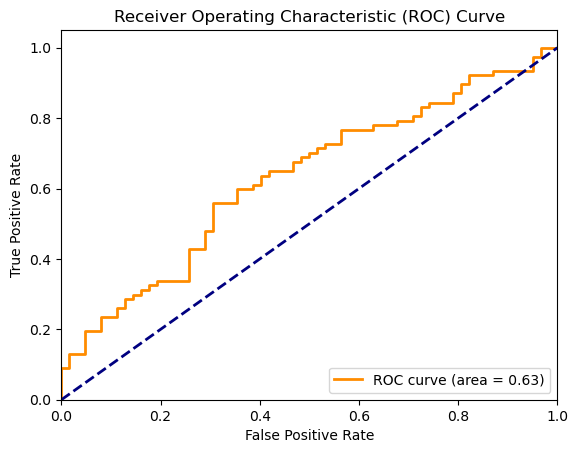

AUC: 0.6292417260159195


In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_scores = mlp_clf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print("AUC:", roc_auc)

Accuracy is 55% and AUC is 0.63. The model is slightly better than random prediction.